# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [23]:
'''
1
Negative Transformation
'''

picture1 = io.imread('./imgs/Picture1.png')
picture1 = rgb2gray(picture1[:,:,:3])
picture2 = io.imread('./imgs/Picture2.png')
picture2 = rgb2gray(picture2[:,:,:3])

In [21]:
def Negative(img,thres):
    myImg = np.copy(img)
    return (myImg - thres)*-1

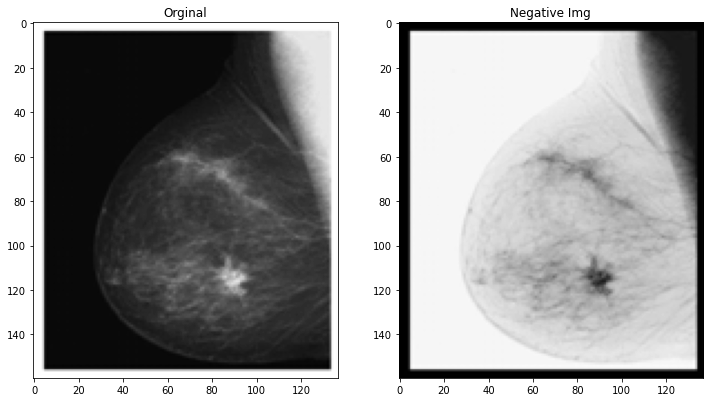

In [22]:
negImg =  Negative(picture1,255)
show_images([picture1,negImg],['Orginal','Negative Img'])

In [12]:
'''
2
Contrast Enhancement
'''



'\n2\nContrast Enhancement\n'

In [26]:
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(img,histogramImg,title):
    plt.figure(facecolor='white')
    plt.title(title)
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')

[   4    9   39   11    6    4   24   34   39  730  282  512 1690 1024
  419  359  347  405  392  485  608  756 1071  740 1036  729  597  694
  442  462  458  465  331  268  273  285  153  126   57   16    2    0
    0    0    0    0    0    0    0    0    1    0    0   18    7    6
    3    7    9   33   35   10   17   22   16    7   10   11    8   10
    4    2    6    6    8    1    0    1    7   23   11   13    4    2
    6    3   14   14   14    8    5    3    0    0    0    0    0    0
    1   41    4    5    5   21   35   17    0    0    0    0    0    0
    1    0    0    1    0    0    0    0    0    0    0    0    0    0
    0 1190]
(2, 128)


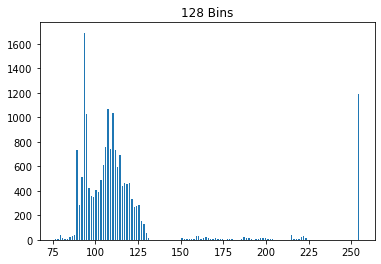

In [39]:

hist = histogram(picture2,nbins=128)
print(hist[0])
print(np.array(hist).shape)
showHist(picture2,hist,"128 Bins")

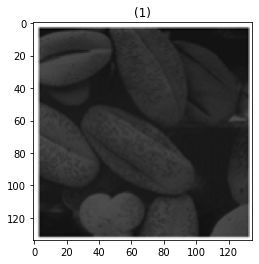

In [31]:
show_images([picture2])

In [40]:
'''
3
Gamma Correction
'''
def Gamma_Correction(img, c, gamma):
    newImg = np.copy(img)
    return c * (newImg ** gamma)



In [42]:
newImg1 = Gamma_Correction(picture2, 1, 3)


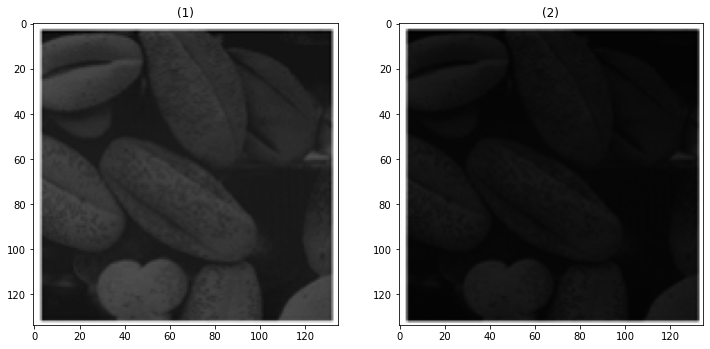

In [44]:
show_images([picture2,newImg1])

In [45]:
newImg2 = Gamma_Correction(picture2, 1, 0.5)

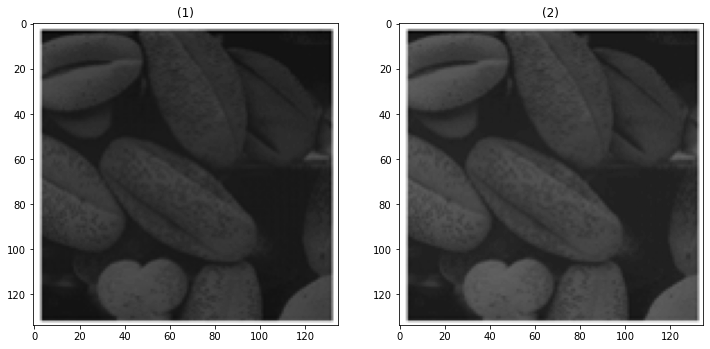

In [46]:
show_images([picture2,newImg2])

In [ ]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(name,ext,nbins=256):
    pass
    
